## Mini Project III

In [35]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

#import seaborn
import seaborn as sns

#import pandas
import pandas as pd

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# cluster hierarchy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [36]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [37]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [38]:
def plot_clusters(X,y_res, xlabel, ylabel, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

In [72]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

In [110]:
df = pd.read_csv('twm_customer.csv', sep=';')
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [111]:
df = df.iloc[:,1:-8] 

Dummies

In [112]:
# df['gender'].str.strip()
# df['gender'] = df['gender'].replace({'M ' : 0, 'F ': 1})
# df


dummy_gender = pd.get_dummies(df['gender'])
df = pd.merge(
    left=df,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)
df.drop(columns=['gender'], inplace=True)

In [113]:
dummy_gender = pd.get_dummies(df['marital_status'])
df = pd.merge(
    left=df,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)
df.drop(columns=['marital_status'], inplace=True)


if skipping dummies don't forget to drop

In [114]:
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['marital_status'], inplace=True)

KeyError: "['gender'] not found in axis"

In [115]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(x, columns=df.columns)
x

,income,age,years_with_bank,nbr_children,F,M,1,2,3,4
0,0.154185,0.184312,0.408539,0.258591,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,-0.887176,1.306339,-0.946541,-0.262049,-0.321555
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,-0.887176,1.306339,-0.946541,-0.262049,-0.321555
4,0.983479,0.864867,1.904514,1.165479,0.887176,-0.887176,-0.765498,-0.946541,-0.262049,3.109892
...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,0.887176,-0.887176,-0.765498,-0.946541,-0.262049,3.109892
743,0.164864,0.707816,0.782533,0.258591,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
744,1.738064,0.393714,-1.461429,1.165479,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
745,-0.343735,-0.286841,1.156526,-0.648298,0.887176,-0.887176,-0.765498,1.056479,-0.262049,-0.321555


In [117]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(747, 2)

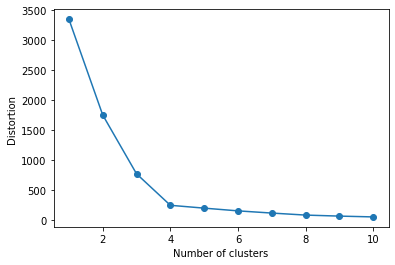

In [119]:
plot_distortion(pca)

In [123]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca[:,0:2])

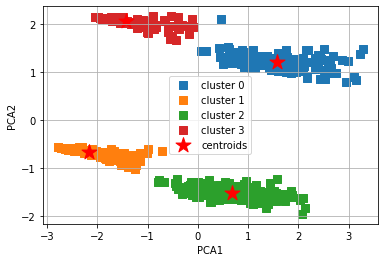

In [122]:
plot_clusters(pca[:,0:2], y_res, 'PCA1', 'PCA2', plt_cluster_centers = True)

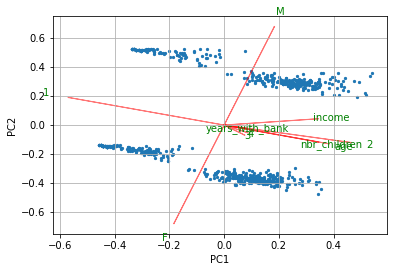

In [124]:
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))

In [48]:
df['cluster'] = y_res
df[df['cluster'] == 0]

,income,age,years_with_bank,nbr_children,F,M,1,2,3,4,cluster
24,19334,42,2,2,1,0,0,0,0,1,0
26,3171,22,1,1,1,0,0,1,0,0,0
27,8976,28,7,1,1,0,0,1,0,0,0
30,24326,60,0,0,1,0,0,1,0,0,0
40,10025,35,5,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
733,9802,66,6,0,1,0,0,0,1,0,0
737,36605,40,0,1,1,0,0,0,0,1,0
740,2289,34,4,0,1,0,0,1,0,0,0
742,14795,36,6,1,1,0,0,0,0,1,0


### PCA Tests

In [392]:
df

,income,age,years_with_bank,nbr_children,F,M,1,2,3,4,cluster
0,26150,46,5,1,0,1,0,1,0,0,1
1,6605,71,1,0,0,1,0,1,0,0,1
2,18548,38,8,0,1,0,1,0,0,0,0
3,47668,54,3,0,1,0,1,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,1,0,0,0,0,1,1
743,26387,56,6,1,0,1,0,1,0,0,1
744,61300,50,0,2,0,1,0,1,0,0,1
745,15100,37,7,0,1,0,0,1,0,0,1


In [207]:
pcamodel.explained_variance_ 

array([2.46397231e+00, 1.43310147e+00, 1.12740709e+00, 1.08195620e+00,
       1.05209758e+00, 8.55848656e-01, 7.07851764e-01, 2.89829273e-01,
       4.58915762e-32])

In [208]:
pcamodel.explained_variance_ratio_

array([2.73408202e-01, 1.59020332e-01, 1.25099760e-01, 1.20056422e-01,
       1.16743239e-01, 9.49669935e-02, 7.85449079e-02, 3.21601424e-02,
       5.09223797e-33])

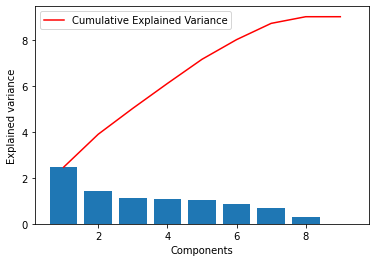

In [209]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

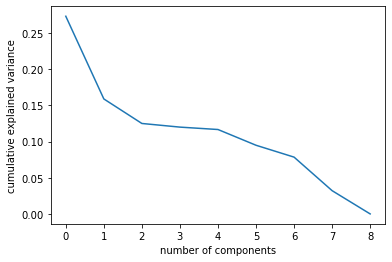

In [210]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

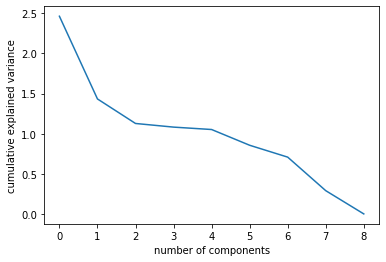

In [211]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

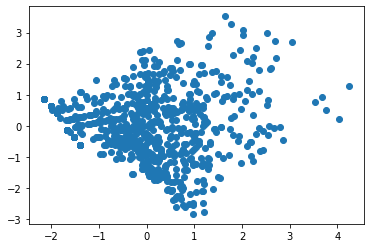

In [320]:
plt.scatter(pca[:, 0], pca[:, 1])


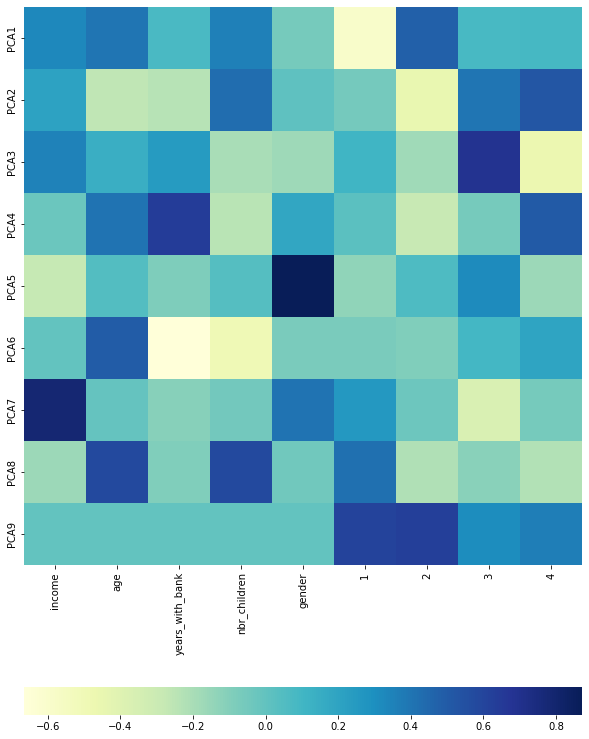

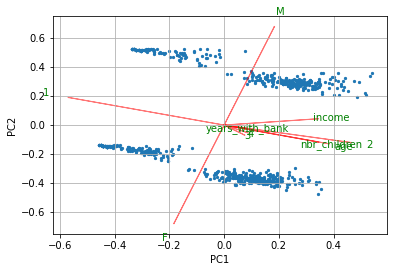

### Part 2

In [125]:
df3 = pd.read_csv('twm_savings_acct.csv', sep=';')
df3

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [126]:
df4 = pd.read_csv('twm_savings_tran.csv', sep=';')
df4

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [127]:
data2 = df4.groupby(by="cust_id", dropna=False).sum()
df5 = df3.join(data2, on='cust_id')
df5
#count and total of tran_amt per cust_id
#Add these as columns to twm_savings_acct.csv

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id,tran_amt,principal_amt,interest_amt,new_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,1176.0,9.50,6.25,3.25,10417.98
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,190.0,-638.84,-645.47,6.63,6750.71
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,78.0,3.78,0.00,3.78,3027.27
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,78.0,9.07,0.00,9.07,7261.90
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,300.0,890.33,857.83,32.50,63006.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,496.0,351.24,348.35,2.89,6279.22
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,561.0,174.91,163.59,11.32,29976.00
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,231.0,212.70,201.92,10.78,12498.25
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,406.0,-73.71,-76.33,2.62,5223.85


In [128]:
test = df4['cust_id'].value_counts().to_frame()
test = test.rename({'cust_id' : 'counts'}, axis=1)
test = test.reset_index()
test = test.rename({'index' : 'cust_id'}, axis=1)
test

,cust_id,counts
0,1363468,62
1,1362567,57
2,1362827,55
3,1362766,55
4,1362777,55
...,...,...
415,1363254,7
416,1362964,6
417,1363135,5
418,1363351,4


In [129]:
df5 = df5.merge(test, how='outer', on='cust_id')

In [130]:
df5['counts'] = df5['counts'].fillna(0)

<AxesSubplot:>

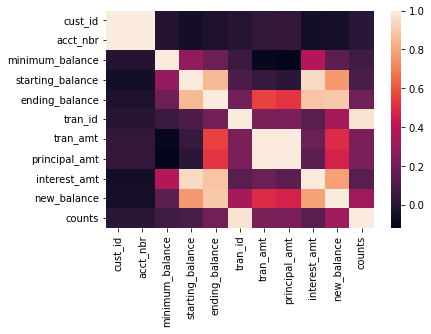

In [131]:
sns.heatmap(df5.corr())

In [132]:
data2 = df5.drop(columns =['cust_id', 'minimum_balance', 'account_active', 'new_balance', 'acct_nbr', 'acct_start_date', 'acct_end_date', 'tran_id', 'principal_amt'])

In [133]:
data2.isnull().sum().sort_values(ascending=False)
data2.fillna(0, inplace=True)

In [134]:
# data2.replace({'acct_type' : {'BS  ' : 0, 'MM  ' : 1}, 'account_active': {"Y " : 1, "N ": 0}}, inplace= True)

 Dummies 

In [135]:
dummy = pd.get_dummies(data2['acct_type'])
data2 = pd.merge(
    left=data2,
    right=dummy,
    left_index=True,
    right_index=True,
)


In [136]:
# dummy = pd.get_dummies(data2['account_active'])
# data2 = pd.merge(
#     left=data2,
#     right=dummy,
#     left_index=True,
#     right_index=True,
# )
# data2.drop(columns=['account_active'], inplace=True)

Or Drop

In [137]:
data2.drop(columns=['acct_type'], inplace=True)

In [138]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
x = scaler.fit_transform(data2)
x = pd.DataFrame(x, columns=data2.columns)
x

,starting_balance,ending_balance,tran_amt,interest_amt,counts,BS,MM
0,-0.447081,-0.553308,-0.349955,-0.396526,1.927099,0.554485,-0.554485
1,-0.130614,-0.606738,-0.955378,-0.325244,-0.681611,-1.803476,1.803476
2,-0.366479,-0.489242,-0.355297,-0.385348,-1.311299,0.554485,-0.554485
3,-0.160851,-0.316109,-0.350357,-0.273786,-1.311299,0.554485,-0.554485
4,0.667935,0.800730,0.472568,0.220337,-0.231833,0.554485,-0.554485
...,...,...,...,...,...,...,...
416,-0.409312,-0.355461,-0.030837,-0.404118,0.397855,0.554485,-0.554485
417,-0.317549,-0.365357,-0.195495,-0.226335,0.577766,0.554485,-0.554485
418,-0.124545,-0.187561,-0.160206,-0.237723,-0.501700,0.554485,-0.554485
419,-0.413642,-0.566119,-0.427657,-0.409812,0.127989,0.554485,-0.554485


In [139]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(421, 2)

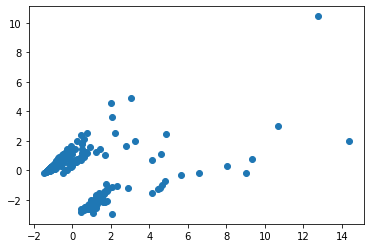

In [140]:
plt.scatter(pca[:, 0], pca[:, 1])

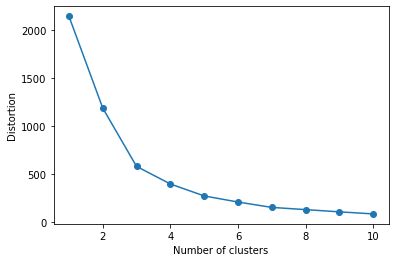

In [141]:
plot_distortion(pca)

In [142]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca[:,0:2])

In [143]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(pca[:,0:2])

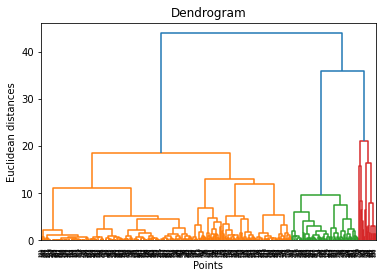

In [144]:
# aglomerative clustering
plot_dendrogram(x)

In [106]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 6)
y_hc = ac.fit_predict(pca[:,0:2])

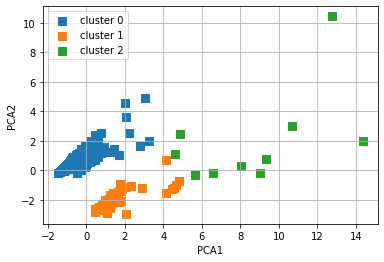

In [107]:
plot_clusters(pca[:,0:2], y_res, 'PCA1', 'PCA2', plt_cluster_centers = False)

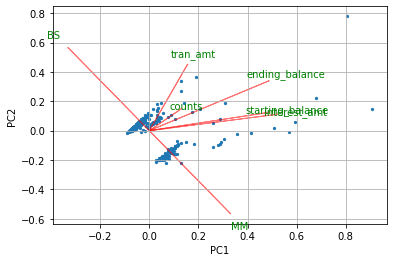

In [108]:
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))

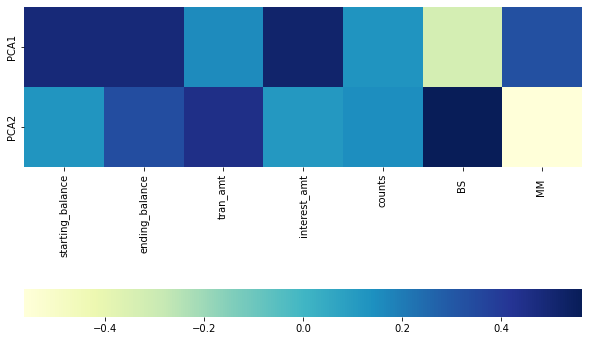

In [109]:
fig = plt.figure(figsize= (10,15))
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [81]:
data2['clusters'] = y_res
data2[data2['clusters'] == 0]['starting_balance'].max()

6223.15

In [85]:
data2[data2['clusters'] == 2]

,starting_balance,ending_balance,tran_amt,interest_amt,counts,BS,MM,clusters
38,8996.64,9132.52,135.88,135.88,12.0,1,0,2
56,17303.42,16095.50,-1207.92,500.57,22.0,0,1,2
70,9223.34,13404.16,4180.82,356.15,31.0,0,1,2
146,5830.18,6325.98,496.25,185.14,31.0,0,1,2
188,11793.93,9387.66,-2405.19,288.77,48.0,0,1,2
272,11352.93,22432.78,11079.94,318.17,55.0,1,0,2
295,7144.42,7144.39,0.24,217.04,36.0,0,1,2
305,9066.08,9341.84,276.39,276.39,12.0,0,1,2
367,1985.18,6619.84,4635.47,119.21,38.0,0,1,2
375,10712.86,10399.11,-313.75,308.42,40.0,0,1,2


### Test to Cluster based on tran_amt

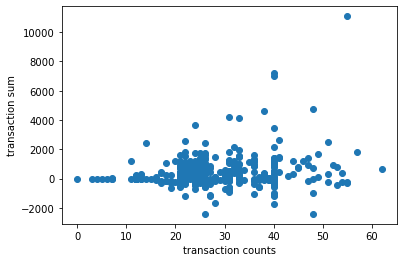

In [133]:
plt.scatter(data2['counts'], data2['tran_amt'])
plt.xlabel('transaction counts')
plt.ylabel('transaction sum')
plt.savefig("tran_amt.png")
plt.show()


In [151]:
from sklearn.cluster import DBSCAN
data3 = pd.merge(data2['counts'], data2['tran_amt'], on=data2.index)
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')
data3= data3.drop(columns='key_0')
data3        
y_db = db.fit_predict(data3)
data3

,counts,tran_amt
0,48.0,9.50
1,19.0,-638.84
2,12.0,3.78
3,12.0,9.07
4,24.0,890.33
...,...,...
416,31.0,351.24
417,33.0,174.91
418,21.0,212.70
419,28.0,-73.71


In [152]:
plot_clusters(data3, y_db, 'PCA1', 'PCA2', plt_cluster_centers = True)

TypeError: '(array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False]), 0)' is an invalid key

### Part 3

In [35]:
df6 = pd.read_csv('twm_credit_tran.csv', sep=';')
df6

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [36]:
df7 = pd.read_csv('twm_credit_acct.csv', sep=';')
df7

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [37]:
data3 = df6.groupby(by="cust_id", dropna=False).sum()
df8 = df7.join(data3, on='cust_id')
df8

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id,tran_amt,principal_amt,interest_amt,new_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,2346.0,380.03,370.77,9.26,-22701.09
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,528.0,-1535.59,-1548.23,13.63,-25387.04
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,253.0,6977.25,6896.57,80.68,-7765.31
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,120.0,2406.65,2302.14,104.69,-28837.36
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,2016.0,-956.10,-1000.00,44.44,-38221.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,2850.0,18.55,-2.11,20.66,-58627.85
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,2775.0,-188.48,-306.11,118.98,-79088.64
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,2926.0,-1218.94,-1218.94,0.00,-35198.02
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,406.0,-9200.00,-9200.00,0.00,-143356.40


In [38]:
data = df8.loc[:,['credit_limit', 'tran_amt']]
data = data.dropna()

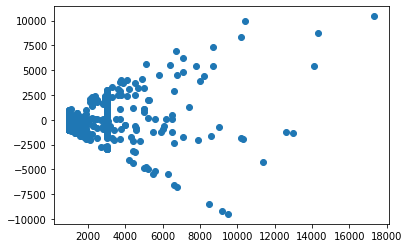

C:\Users\emreb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


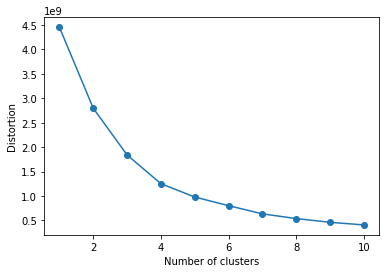

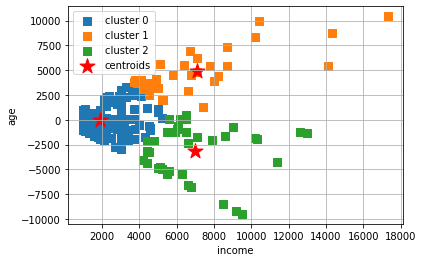

In [40]:
plot_distortion(data)
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(data)
plot_clusters(data.values, y_res, 'income', 'age', plt_cluster_centers = True)